# Building A Handwritten Digits Classifier
In this Project, we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models - for image classification
- train, test, and improve a few different deep neural networks for image classification

Deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks [here](https://arxiv.org/pdf/1803.01164.pdf).

We'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in [this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).


## Why is image Classification a hard task?
Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

## Working with Image Data

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data=load_digits()

In [2]:
digits_data.keys()

dict_keys(['images', 'data', 'DESCR', 'target', 'target_names'])

In [3]:
digits_data['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [4]:
labels=pd.Series(digits_data['target'])
labels.head(5)

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [5]:
data=pd.DataFrame(digits_data['data'])
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


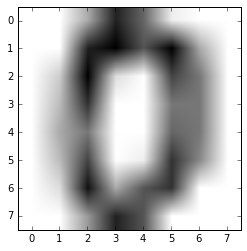

In [6]:
first_image=data.iloc[0]
np_image=first_image.values
np_image=np_image.reshape(8,8)
plt.imshow(np_image,cmap='gray_r')

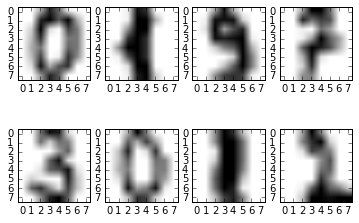

In [7]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearnest Neighbors Model

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

def train_knn(neighbors,train_features,train_labels):
    knn=KNeighborsRegressor(n_neighbors=neighbors)
    knn.fit(train_features,train_labels)
    return knn
def test(model,test_features,test_labels):
    predictions=model.predict(test_features)
    train_test_df=pd.DataFrame()
    train_test_df['corrected_label']=test_labels
    train_test_df['predicted_label']=predictions
    overall_accuracy=sum(train_test_df['predicted_label']==train_test_df['corrected_label'])/len(train_test_df)
    return overall_accuracy
def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,shuffle=True)
    for train_index,test_index in kf.split(data):
        train_features,test_features=data.loc[train_index],data.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        model=train_knn(k,train_features,train_labels)
        overall_accuracy=test(model,test_features,test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_accuracies=cross_validate(1)
np.mean(knn_accuracies)
    
    
    
    


0.9866468695867361

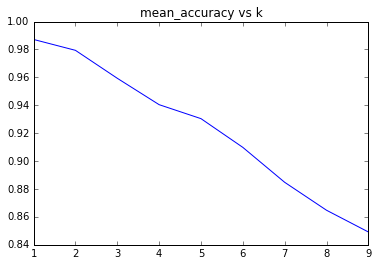

In [9]:
k_values=list(range(1,10))
k_overall_accuracies=[]

for k in k_values:
    k_accuracies=cross_validate(k)
    k_mean_accuracy=np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)

plt.title('mean_accuracy vs k')    
plt.plot(k_values,k_overall_accuracies)    
    

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

## Neural Network With One Hidden Layer

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def train_nn(neuron_arch,train_features,train_labels):
    mlp=MLPClassifier(hidden_layer_sizes=(neuron_arch))
    mlp.fit(train_features,train_labels)
    return mlp
def test_nn(model,test_features,test_labels):
    predictions=model.predict(test_features)
    nn_accuracy=accuracy_score(test_labels,predictions)
    return nn_accuracy
def cross_validate(neuron_arch):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data):
        train_features,test_features=data.loc[train_index],data.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        model=train_nn(neuron_arch,train_features,train_labels)
        overall_accuracy=test_nn(model,test_features,test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies    

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



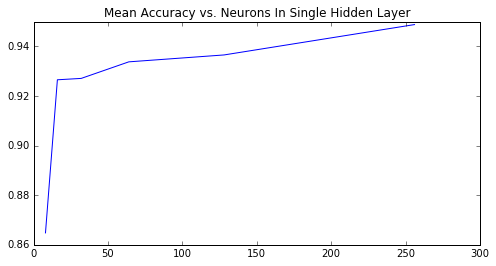

In [13]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

By adding neurons to the single hidden layer the accuracy has increased from 88% to 94%, though using single layer neural network isn't prefered compared to K- nearest Neighbors 96% accuracy.
Also we lack information on false or true positives or false or true negatives.

## Neural Network with Two Hidden Layers

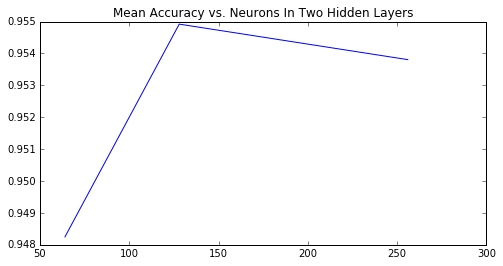

In [16]:

nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [17]:
nn_two_accuracies

[0.9482479584261321, 0.9549208116802772, 0.9538072259341748]

In [18]:
nn_one_accuracies

[0.8648057411531799,
 0.9265404602821083,
 0.9270923038851769,
 0.9337713437268004,
 0.9365553080920564,
 0.948798564711705]

Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## Neural Network with Three Hidden Layers

In [20]:
def train_nn(neuron_arch,train_features,train_labels):
    mlp=MLPClassifier(hidden_layer_sizes=(neuron_arch))
    mlp.fit(train_features,train_labels)
    return mlp
def test_nn(model,test_features,test_labels):
    predictions=model.predict(test_features)
    nn_accuracy=accuracy_score(test_labels,predictions)
    return nn_accuracy
def cross_validate_six(neuron_arch):
    fold_accuracies=[]
    kf=KFold(n_splits=6,random_state=2)
    for train_index,test_index in kf.split(data):
        train_features,test_features=data.loc[train_index],data.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        model=train_nn(neuron_arch,train_features,train_labels)
        overall_accuracy=test_nn(model,test_features,test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies    

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



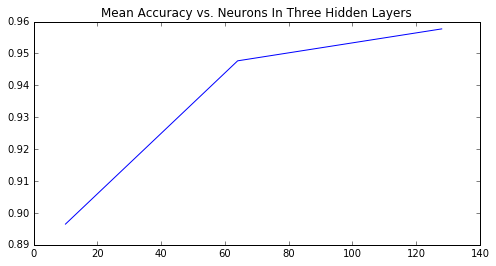

In [21]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

Increasing number of hidden layers has significantly improved the accuracy of the model upto 96% even after the 6-Fold Validation. Hence,Having more layers and more neurons tends to improve the network's performance.